In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [33]:
import pandas as pd
import sklearn
import sys 
sys.path.append('./')
import check_data
import myplot
import mystat
from imp import reload
reload(myplot)
reload(mystat)

<module 'mystat' from '/mnt/e/jupyter/bin/mislabel/mystat.py'>

In [3]:
df1 = pd.read_csv("../../data/mislabeled_samples/test_pro.tsv",sep="\t").T
df2 = pd.read_csv("../../data/mislabeled_samples/test_cli.tsv",sep="\t").set_index('sample')

# 数据统计
* shape
* describe()
* 平行坐标图
** 归一化或者不归一化
* 属性和属性 或者 与目标之间的相关性
* qq plot
* boxplot(归一化）
* 相关性的统计 热图
* logistic 回归



## 数据检查
* 查看数据的维度，其中列代表特征，行代表实例。
* 属性也被称之为预测因子、特征、独立变量、输入； 标签也通常被称之为结果、目标、依赖变量、响应。
* 当标签是数值的，称之为回归问题；当标签是类别的，称之为分类问题

### 数据的行数和列数

In [4]:
check_data.shape(df1)

该数据有80个实例(样品)，4118个属性(维度)


### 每个属性的特征检查
* na ： not available ； nan：not a number
* 计算每个属性的相关特点，例如类型（float，string），长度，缺失的个数与比例
* 添加float类型的mean，std等，string的类型
* range ： float是min和max，string是类别
* information： float是四分位数， string是个数

In [5]:
df1.head()

,A1BG,A2M,AAAS,AACS,AAGAB,AAK1,AAMDC,AARS,AARS2,AASDHPPT,...,ZNF185,ZNF207,ZNF280C,ZNF326,ZNF638,ZNF706,ZPR1,ZW10,ZYX,ZZEF1
Testing_1,3.446723,5.994520,2.168001,NaN,NaN,1.613696,NaN,4.412741,3.166511,1.056106,...,NaN,2.528991,NaN,2.245434,NaN,1.058798,1.848274,2.565798,3.597116,1.636396
Testing_2,3.669580,6.371038,2.410543,1.024838,0.991114,1.192009,NaN,4.769827,3.096463,2.355183,...,1.005540,1.976372,NaN,1.287584,1.733361,NaN,0.997150,2.265862,3.967766,1.802938
Testing_3,3.398472,6.132440,NaN,NaN,1.096724,2.132646,1.141625,4.273302,0.998518,NaN,...,NaN,1.399577,NaN,1.908988,1.126579,NaN,1.120824,2.944166,3.779964,1.756282
Testing_4,3.112875,5.645341,2.211822,1.099892,1.056902,2.060400,NaN,4.904586,2.417391,NaN,...,1.076813,2.571042,NaN,2.288274,1.081373,1.780610,1.074043,NaN,3.918465,NaN
Testing_5,3.535956,5.532811,0.987561,1.076615,NaN,NaN,1.067227,2.481525,3.285401,1.049430,...,NaN,2.523349,NaN,2.886522,NaN,1.721321,NaN,1.795269,3.535849,NaN


In [6]:
check_data.feature_type(df2)

,col,name,type,length,NA_count,missing_rate,range,information
0,0,gender,string,80,0,0.0,"Female,Male","31,49"
1,1,msi,string,80,0,0.0,"MSI-Low/MSS,MSI-High","66,14"


### 对标签或者属性的分布进行正态分布的检测

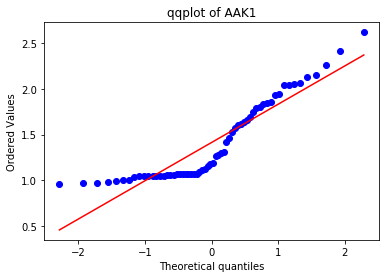

R^2 = 0.858062292643213


In [7]:
gene = 'AAK1'
r2 = plot.qqplot(df1[gene],gene)
print("R^2 = {0}".format(r2))

### 平行坐标图

画出所有属性的折线图，并按组来上色，观察分布情况

In [8]:
tt = plot.myPlot(df1.T.head(10),color_by=pd.DataFrame(df2['gender']))

In [9]:
tt.line_plot()

### 属性对（属性和标签）的交会散点图

1022finish

In [10]:
tt = plot.myPlot(df1)
tt.scatter_plot(x='A1BG',y=['AAAS','A2M','AAK1'])
isinstance(['a'],list)

True

### 用热图展示属性和标签的相关性

In [11]:
ss = df1.iloc[:,:100].corr() ## or use corrwith(df2)

In [12]:
tt = plot.myPlot(ss)
tt.heat_plot(color='Hot')

### boxplot 

In [13]:
tt = plot.myPlot(df1.iloc[:,:10])
tt.box_plot(xlabel='gene',ylabel='TPM',title='box plot for every gene')

### normalization for dataframe

In [14]:
df1_norm = plot.myDF(df1).normalization()

In [15]:
tt = plot.myPlot(df1_norm.iloc[:,:10])
tt.box_plot(xlabel='gene',ylabel='TPM',title='box plot for every gene')

In [16]:
plot.myPlot(df1.T.head(10),color_by=pd.DataFrame(df2['gender'])).line_plot()

## 结果检查

### 评估预测模型的性能 (coding in module)
https://www.cnblogs.com/Zhi-Z/p/8728168.html

* 回归问题
  * MSE ： mean square error，如果MSE比方差小，则可能是一个好的分类器
  * MAE ： mean abusolute error
  * RMSE ： root mean square error
* 分类问题
  * 误分类率
  * ROC与AUC
   * 横坐标 假正率 = FP/(TN + FP)
   * 纵坐标 真正率 = TP/(TP + FN)
  * 准确率 Accuracy  ： （TP + TN） / (TP+TN+FP+FN)
  * 错误率 ： 1- 准确率
  * 灵敏度 sensitive ： TP/（TP+FN）
  * 特效性 specificity ： TN/（FP+TN）
  * 精确率 : Precision = TP/(TP+FP)  
  * 召回率 : recall=TP/(TP+FN)=TP/P=sensitive
  * F1-measure : 2PR/(P+R)

In [35]:
stat.PN(19,29,5,3)

{'accuracy': 0.8571428571428571,
 'sensitive': 0.8636363636363636,
 'specificity': 0.8529411764705882,
 'precision': 0.7916666666666666,
 'recall': 0.8636363636363636,
 'f1': 0.8260869565217391}

### 影响算法选择及性能的因素
* 简单问题和复杂问题：即问题本身的模型是简单的还是复杂的
  * 如果真实问题不复杂，或者没有足够多的数据，线性模型是一个好的答案
* 简单模型和复杂模型
* 数据量大小
* 数据的类型
  * 列比行多的数据，用线性模型；反之用非线性模型
  
  

# 惩罚线性回归模型
往OLS中添加一个系数惩罚项，用于控制系数过大导致的过拟合？？
http://scikit-learn.org/stable/modules/linear_model.html

## 惩罚线性回归的优点
* 模型训练足够快速
* 得到变量的重要性信息
* 部署时足够快速
* 希望模型为稀疏解的（只使用部分属性进行预测）
* 适合线性模型解决的问题

## 类别
* 前向回归： 每次加上一个变量，然后不断新增
* rigid 岭回归 ： lambda(beta**2)/2  利用欧氏距离
* Laso 套索回归 : lambda( abs(beta)) 利用曼哈顿距离
* LARS 最小角度回归： 每次在相关性最大的变量上加上一个小的角度，直至平衡
* Glmnet： 通过决定 lambda的大小来推进曲线。
### 其他处理 
* 二分类变成0、1，多分类变成多个结果
* 当不是线性模型的时候，使用相关的转换

## 注意的事情
* 抽样时注意 是否存在某类属性值较少，导致结果不一致。
* 这些包是否对属性进行归一化，结果可能不一致

In [4]:
df1 = pd.read_csv("../../data/mislabeled_samples/winequality-red.csv",sep=';')

In [5]:
X=df1.iloc[:,:-1]
Y=pd.DataFrame(df1['quality'])

## 案例
### 普通线性模型
当属性间不相互独立时，共线性的问题就会很严重，一般是实验设计不好造成

In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y)
reg.coef_
Z= reg.predict(X)

In [30]:
mystat.MAE(pd.DataFrame(Z)[0],Y.iloc[:,0]),mystat.MSE(pd.DataFrame(Z)[0],Y.iloc[:,0]),

(0.5004899635644869, 0.4167671672214082)

In [36]:
sklearn.metrics.mean_squared_error(Y ,Z),sklearn.metrics.r2_score(Y,Z)

(0.4167671672214078, 0.36055170303868855)

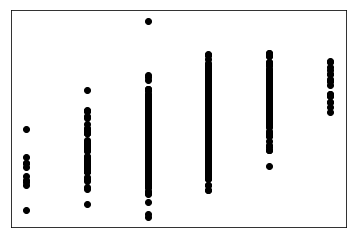

In [52]:
import matplotlib.pyplot as plt
plt.scatter(Y, Z,  color='black')
plt.xticks(())
plt.yticks(())
plt.show()

### 岭回归
https://www.cnblogs.com/gasongjian/p/8060086.html

#### 普通的使用

In [57]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = 1.5)
reg.fit(X,Y)
reg.coef_
Z= reg.predict(X)

In [58]:
sklearn.metrics.mean_squared_error(Y ,Z),sklearn.metrics.r2_score(Y,Z)

(0.4178526068237868, 0.3588863067220279)

In [64]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

#### 利用RidgeCV来进行网格搜索。

In [69]:
from sklearn import linear_model
reg = linear_model.RidgeCV (alphas = [0.1 , 1,10], cv=5)
reg.fit(X,Y)
reg.coef_
Z= reg.predict(X)
reg.alpha_,sklearn.metrics.mean_squared_error(Y ,Z),sklearn.metrics.r2_score(Y,Z)

(0.1, 0.41695265706409446, 0.3602671048905177)

### Lasso回归

In [71]:
from sklearn import linear_model
reg = linear_model.Lasso (alpha = 1.5)
reg.fit(X,Y)
reg.coef_
Z= reg.predict(X)
sklearn.metrics.mean_squared_error(Y ,Z),sklearn.metrics.r2_score(Y,Z)

(0.6315104308748599, 0.03106986035273629)

#### 进行网格搜索

In [83]:
reg = linear_model.LassoCV (cv=10)
reg.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1108: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

[]

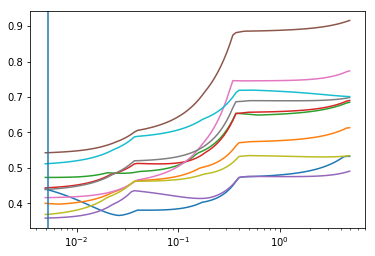

In [89]:
import matplotlib.pyplot as plt
plt.plot(reg.alphas_ , reg.mse_path_)
plt.axvline(reg.alpha_ )
plt.semilogx()

In [106]:
alphas , coefs ,_ = linear_model.lasso_path (X,Y,return_models=False)
coefs[0].T.shape,alphas

((100, 11),
 array([2.56979362e+02, 2.39659813e+02, 2.23507544e+02, 2.08443883e+02,
        1.94395463e+02, 1.81293860e+02, 1.69075260e+02, 1.57680154e+02,
        1.47053039e+02, 1.37142156e+02, 1.27899234e+02, 1.19279254e+02,
        1.11240231e+02, 1.03743012e+02, 9.67510802e+01, 9.02303812e+01,
        8.41491555e+01, 7.84777841e+01, 7.31886441e+01, 6.82559744e+01,
        6.36557502e+01, 5.93655657e+01, 5.53645252e+01, 5.16331415e+01,
        4.81532406e+01, 4.49078733e+01, 4.18812330e+01, 3.90585781e+01,
        3.64261606e+01, 3.39711593e+01, 3.16816169e+01, 2.95463819e+01,
        2.75550547e+01, 2.56979362e+01, 2.39659813e+01, 2.23507544e+01,
        2.08443883e+01, 1.94395463e+01, 1.81293860e+01, 1.69075260e+01,
        1.57680154e+01, 1.47053039e+01, 1.37142156e+01, 1.27899234e+01,
        1.19279254e+01, 1.11240231e+01, 1.03743012e+01, 9.67510802e+00,
        9.02303812e+00, 8.41491555e+00, 7.84777841e+00, 7.31886441e+00,
        6.82559744e+00, 6.36557502e+00, 5.93655657e+

(362.9929971613107,
 0.18192745607334965,
 -0.025260687416920155,
 0.5252059647670067)

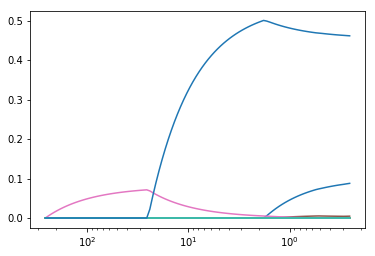

In [108]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas , coefs[0].T)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')


#### 对X进行归一化

In [109]:
alphas , coefs , _ = linear_model.lasso_path (mystat.normalization(X),Y,return_models=False)
coefs[0].T.shape,alphas

((100, 11),
 array([6.30050358e-02, 5.87587072e-02, 5.47985670e-02, 5.11053270e-02,
        4.76609990e-02, 4.44488072e-02, 4.14531064e-02, 3.86593057e-02,
        3.60537979e-02, 3.36238926e-02, 3.13577548e-02, 2.92443470e-02,
        2.72733759e-02, 2.54352417e-02, 2.37209915e-02, 2.21222761e-02,
        2.06313087e-02, 1.92408276e-02, 1.79440602e-02, 1.67346906e-02,
        1.56068284e-02, 1.45549804e-02, 1.35740235e-02, 1.26591797e-02,
        1.18059934e-02, 1.10103089e-02, 1.02682510e-02, 9.57620521e-03,
        8.93080103e-03, 8.32889493e-03, 7.76755529e-03, 7.24404806e-03,
        6.75582347e-03, 6.30050358e-03, 5.87587072e-03, 5.47985670e-03,
        5.11053270e-03, 4.76609990e-03, 4.44488072e-03, 4.14531064e-03,
        3.86593057e-03, 3.60537979e-03, 3.36238926e-03, 3.13577548e-03,
        2.92443470e-03, 2.72733759e-03, 2.54352417e-03, 2.37209915e-03,
        2.21222761e-03, 2.06313087e-03, 1.92408276e-03, 1.79440602e-03,
        1.67346906e-03, 1.56068284e-03, 1.45549804e-

(0.08899697852532854,
 4.460414946829523e-05,
 -1.7532710061724777,
 2.068056772066781)

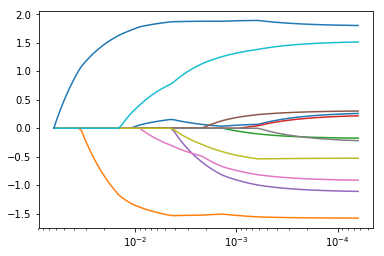

In [110]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas , coefs[0].T)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')


看哪个变量最开始进入

In [123]:
cof_df = pd.DataFrame(coefs[0]).T
cof_df.columns = X.columns
cof_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158077
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305500
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.442987
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571208
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690788
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.802308
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.906312
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003306
9,0.000000,-0.040785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.087592
